<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/week_4/blob/main/Copy_of_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.optimizers import Adam,Adagrad
from tensorflow.keras.regularizers import l2

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Bus_Breakdown_and_Delays.csv')

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [60]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/12aBIm8P9RZfcklyd4j2_K0_gK5C7Xua0Bxr4a_sdXPE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [6]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [8]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


<Axes: >

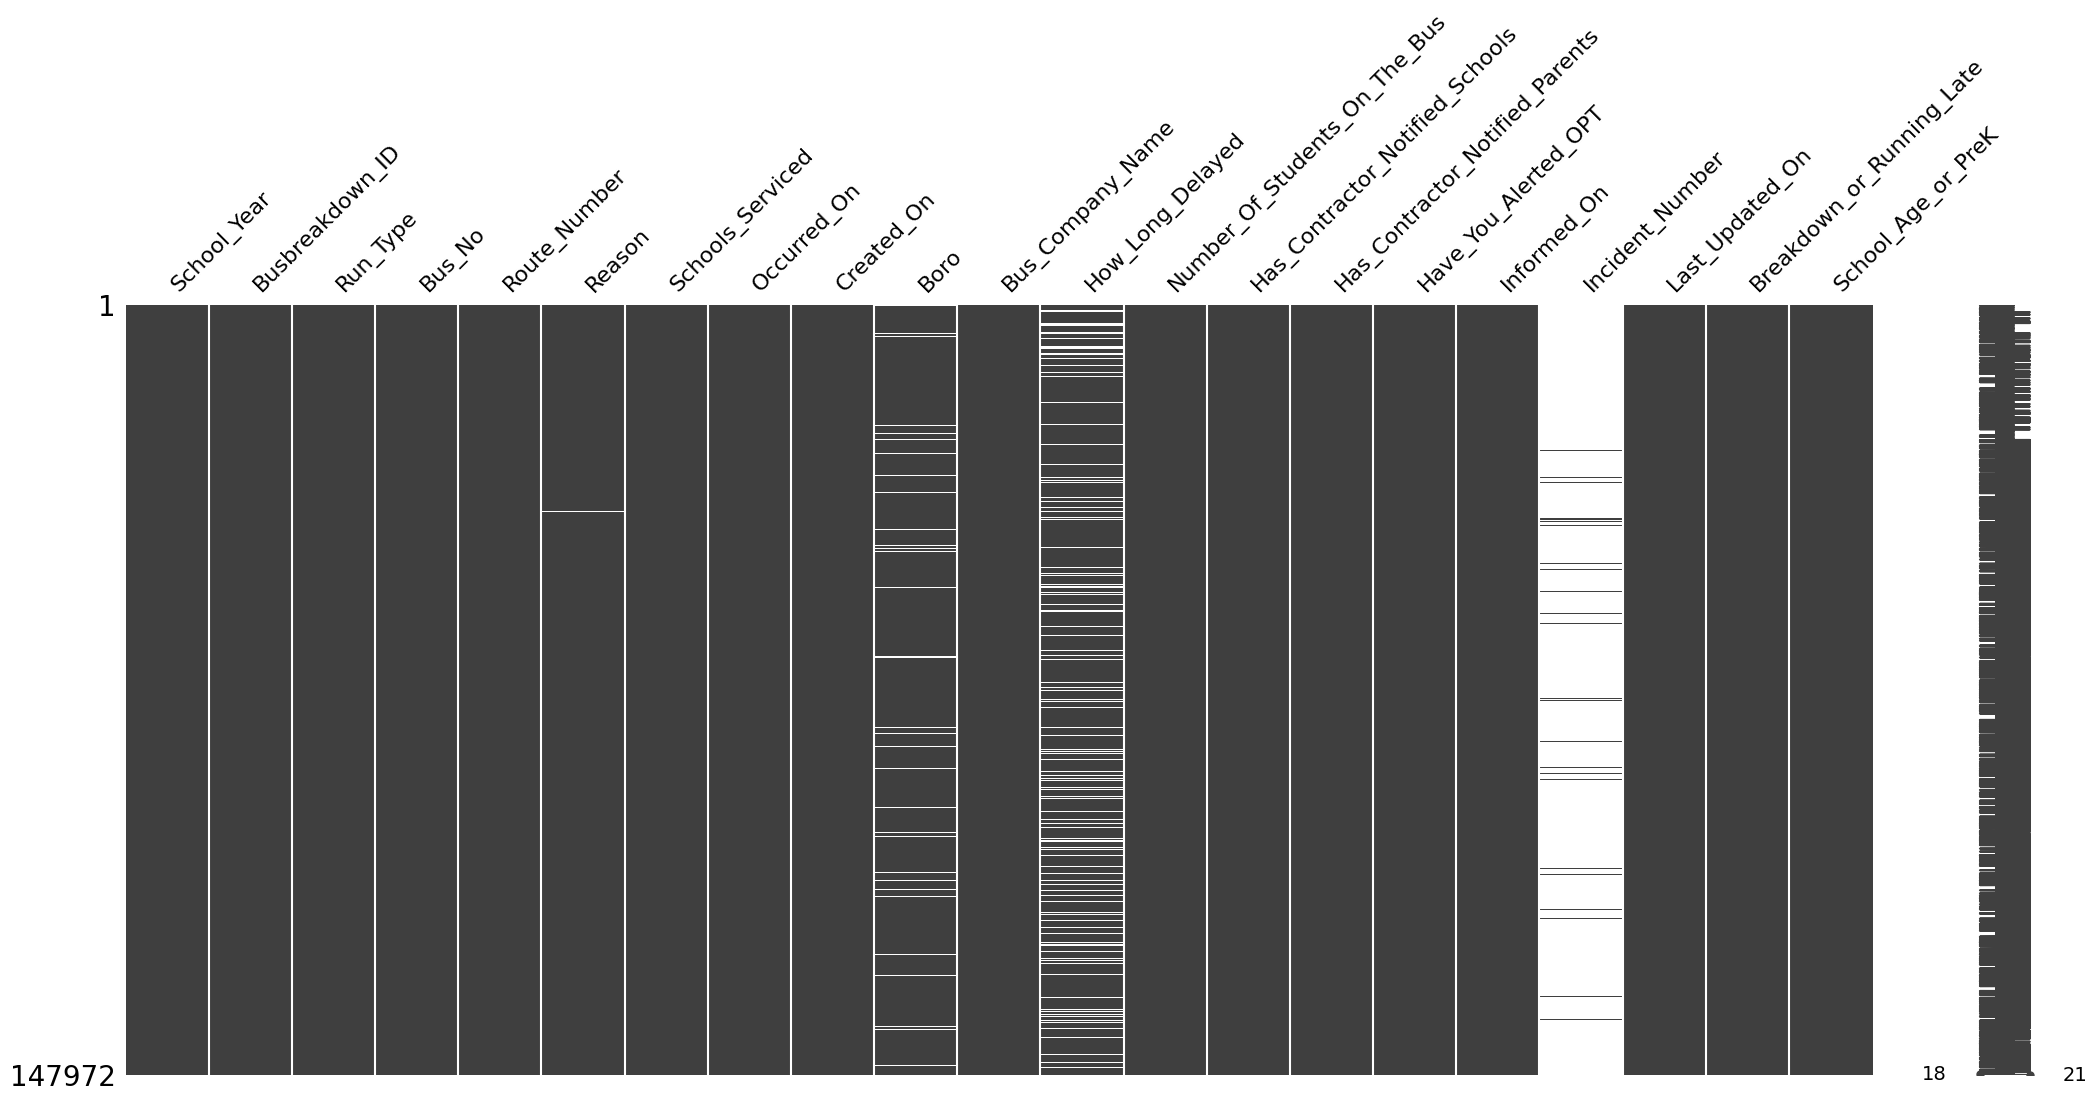

In [9]:
import missingno as msno
msno.matrix(df)

In [10]:
df.set_index('Busbreakdown_ID', inplace=True)

In [11]:
df.describe()

,Number_Of_Students_On_The_Bus
count,147972.000000
mean,3.590071
std,55.365859
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,9007.000000


In [12]:
df.shape

(147972, 20)

In [13]:
df.duplicated().sum()

35

In [14]:
df=df.fillna(df[df.columns].mean)

In [15]:
df.isnull().sum()

,0
School_Year,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0
Bus_Company_Name,0


In [9]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
for col in numerical_features:
  print(f"Value counts for {col}:")
  print(df[col].value_counts())
  print("\n")

Value counts for Number_Of_Students_On_The_Bus:
Number_Of_Students_On_The_Bus
0       78712
2       10223
1        9361
3        9242
4        7673
        ...  
3112        1
2680        1
2844        1
4533        1
2855        1
Name: count, Length: 123, dtype: int64




In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(df[col].dtype)
    print()

School_Year
['2015-2016' '2016-2017' '2017-2018' '2019-2020']
object

Run_Type
['Pre-K/EI' 'Special Ed AM Run' 'General Ed AM Run' 'Special Ed PM Run'
 'General Ed PM Run' 'Special Ed Field Trip' 'General Ed Field Trip' nan
 'Project Read PM Run' 'Project Read AM Run' 'Project Read Field Trip']
object

Bus_No
['811' '9302' '358' ... '0096' 'GVC510' 'K9345']
object

Route_Number
['1' '2' 'P640' ... '012' '29AM' '1409B']
object

Reason
['Other' 'Heavy Traffic' 'Flat Tire' 'Mechanical Problem'
 'Delayed by School' 'Problem Run' 'Late return from Field Trip'
 'Won`t Start' 'Weather Conditions' 'Accident' nan]
object

Schools_Serviced
['C353' 'C814' 'C195' ... 'C148' '02654, 02721,' '04377, 04454, 04658']
object

Occurred_On
['10/26/2015 08:30:00 AM' '10/27/2015 07:10:00 AM'
 '09/18/2015 07:36:00 AM' ... '05/25/2017 04:22:00 PM'
 '05/25/2017 04:27:00 PM' '05/25/2017 04:36:00 PM']
object

Created_On
['10/26/2015 08:40:00 AM' '10/27/2015 07:11:00 AM'
 '09/18/2015 07:38:00 AM' ... '05/25/2017 

In [73]:
df.columns

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

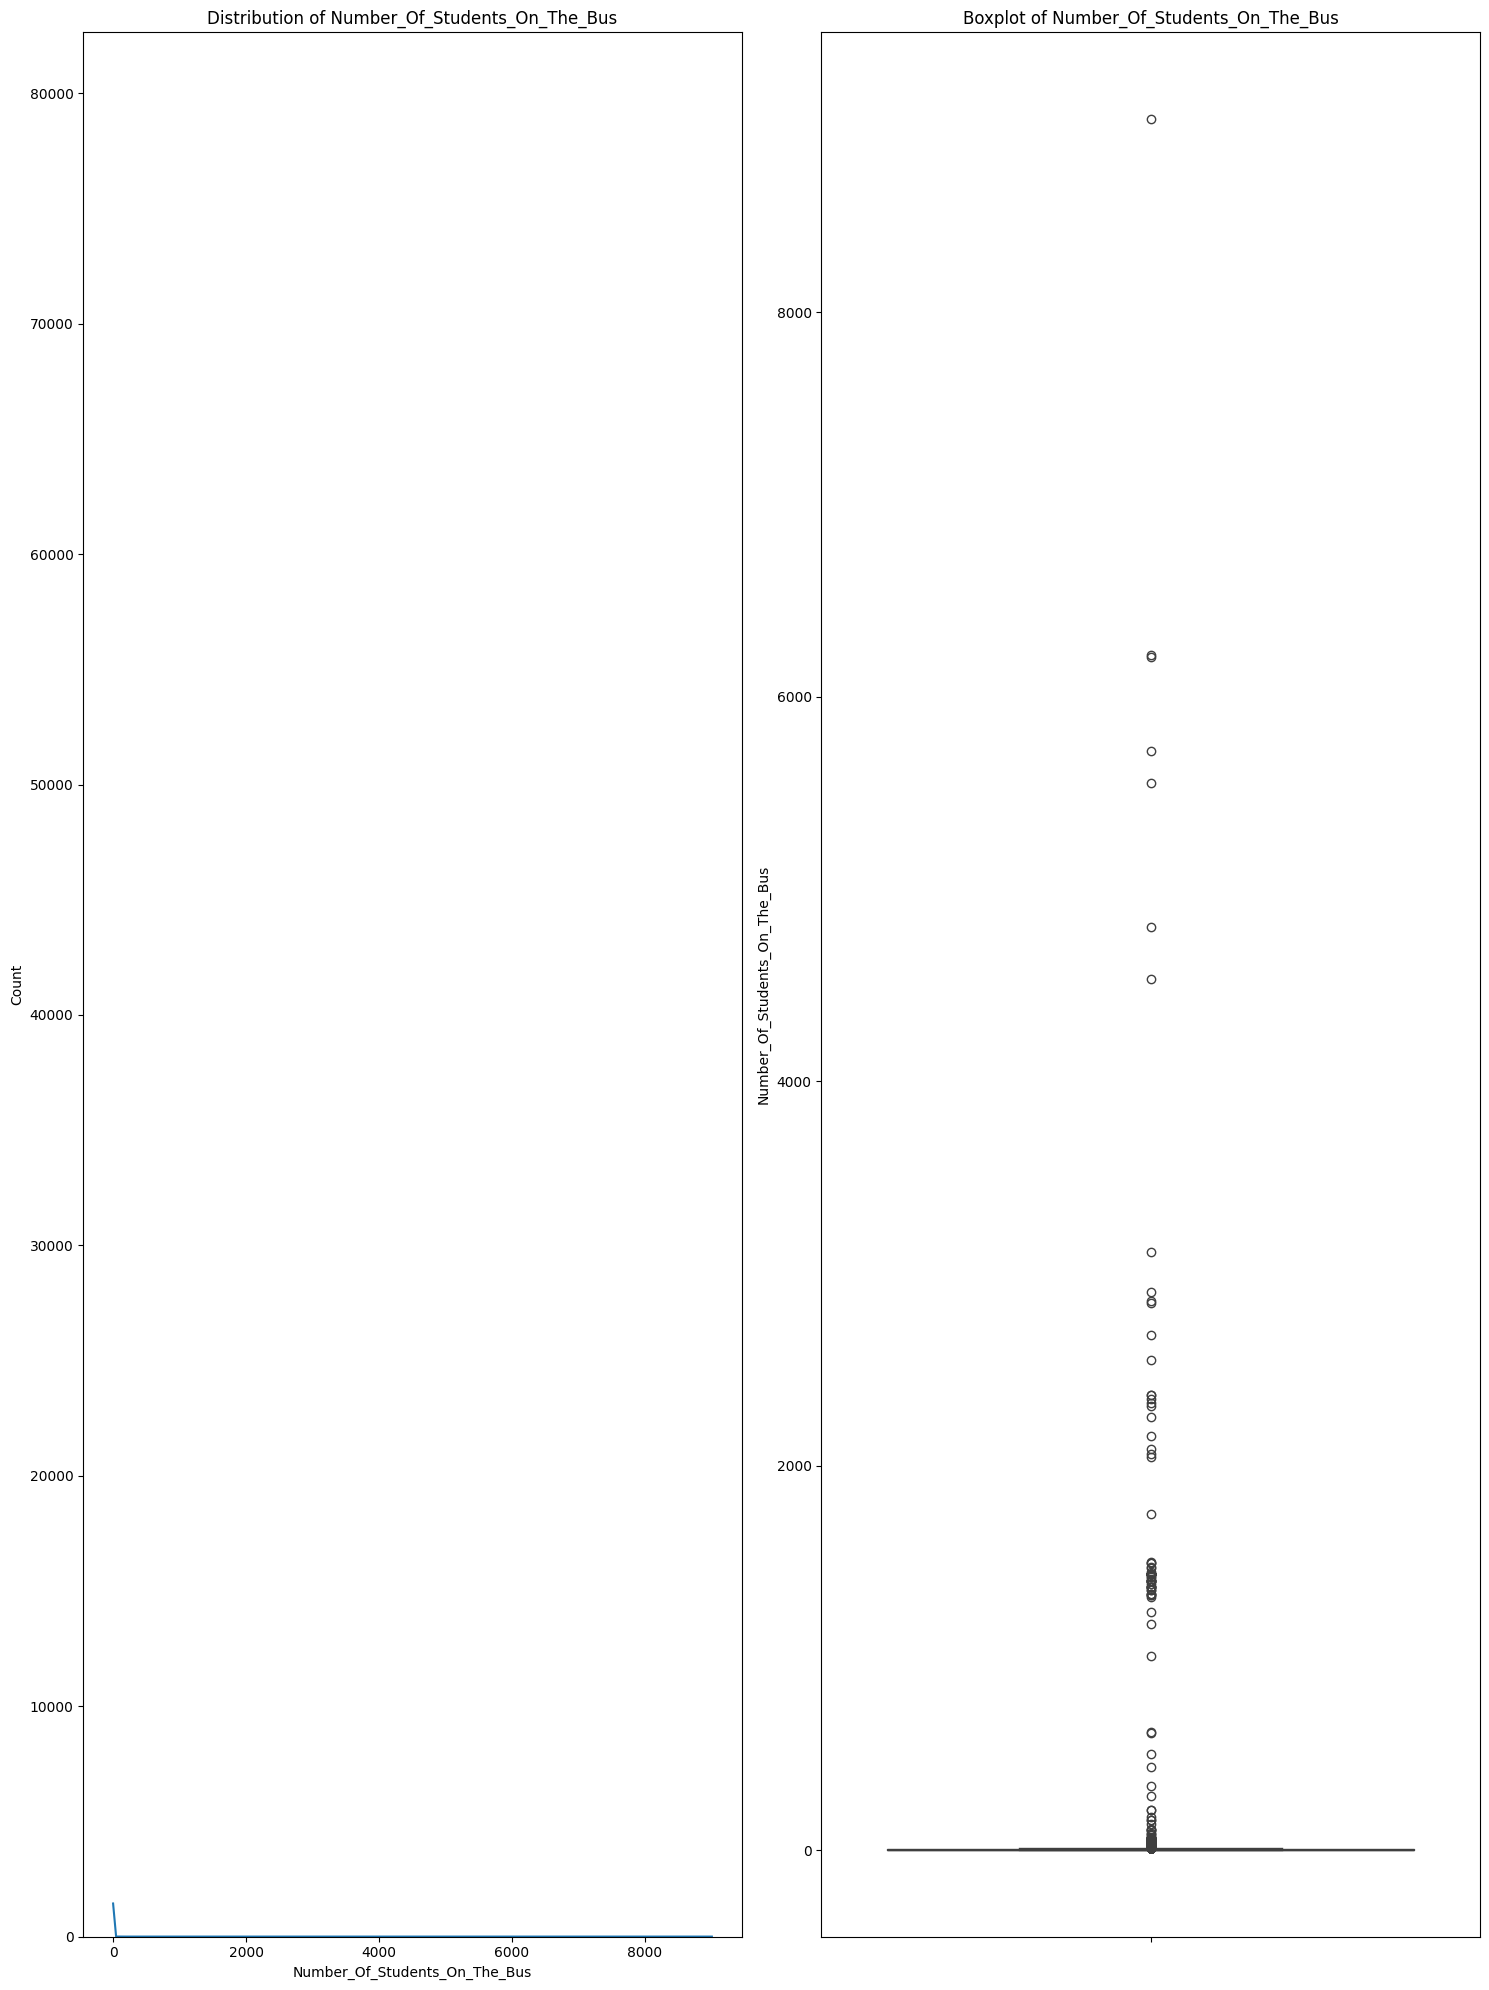

In [11]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(15, 20))


for i, feature in enumerate(numerical_features.columns):
    plt.subplot(len(numerical_features.columns), 2, i + 1)


    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')


    plt.subplot(len(numerical_features.columns), 2, i + 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()

plt.show()

In [13]:
df.columns

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147972 entries, 1224901 to 1353046
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Run_Type                         147883 non-null  object
 2   Bus_No                           147972 non-null  object
 3   Route_Number                     147884 non-null  object
 4   Reason                           147870 non-null  object
 5   Schools_Serviced                 147972 non-null  object
 6   Occurred_On                      147972 non-null  object
 7   Created_On                       147972 non-null  object
 8   Boro                             141654 non-null  object
 9   Bus_Company_Name                 147972 non-null  object
 10  How_Long_Delayed                 126342 non-null  object
 11  Number_Of_Students_On_The_Bus    147972 non-null  int64 
 12  Has_Contractor

In [8]:
colm=['Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK']

In [3]:
df = pd.get_dummies(df, columns=['Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'])

NameError: name 'pd' is not defined

In [9]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = OrdinalEncoder()


label_encoder.fit_transform(df[colm])
X_cat_enc = label_encoder.fit_transform(df[colm])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = OrdinalEncoder()

label_encoder.fit_transform(df[colm])


In [ ]:
df.info()

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64'])
scaled_data = scaler.fit_transform(numerical_features)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features.columns)
df[numerical_features.columns] = scaled_df

In [11]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

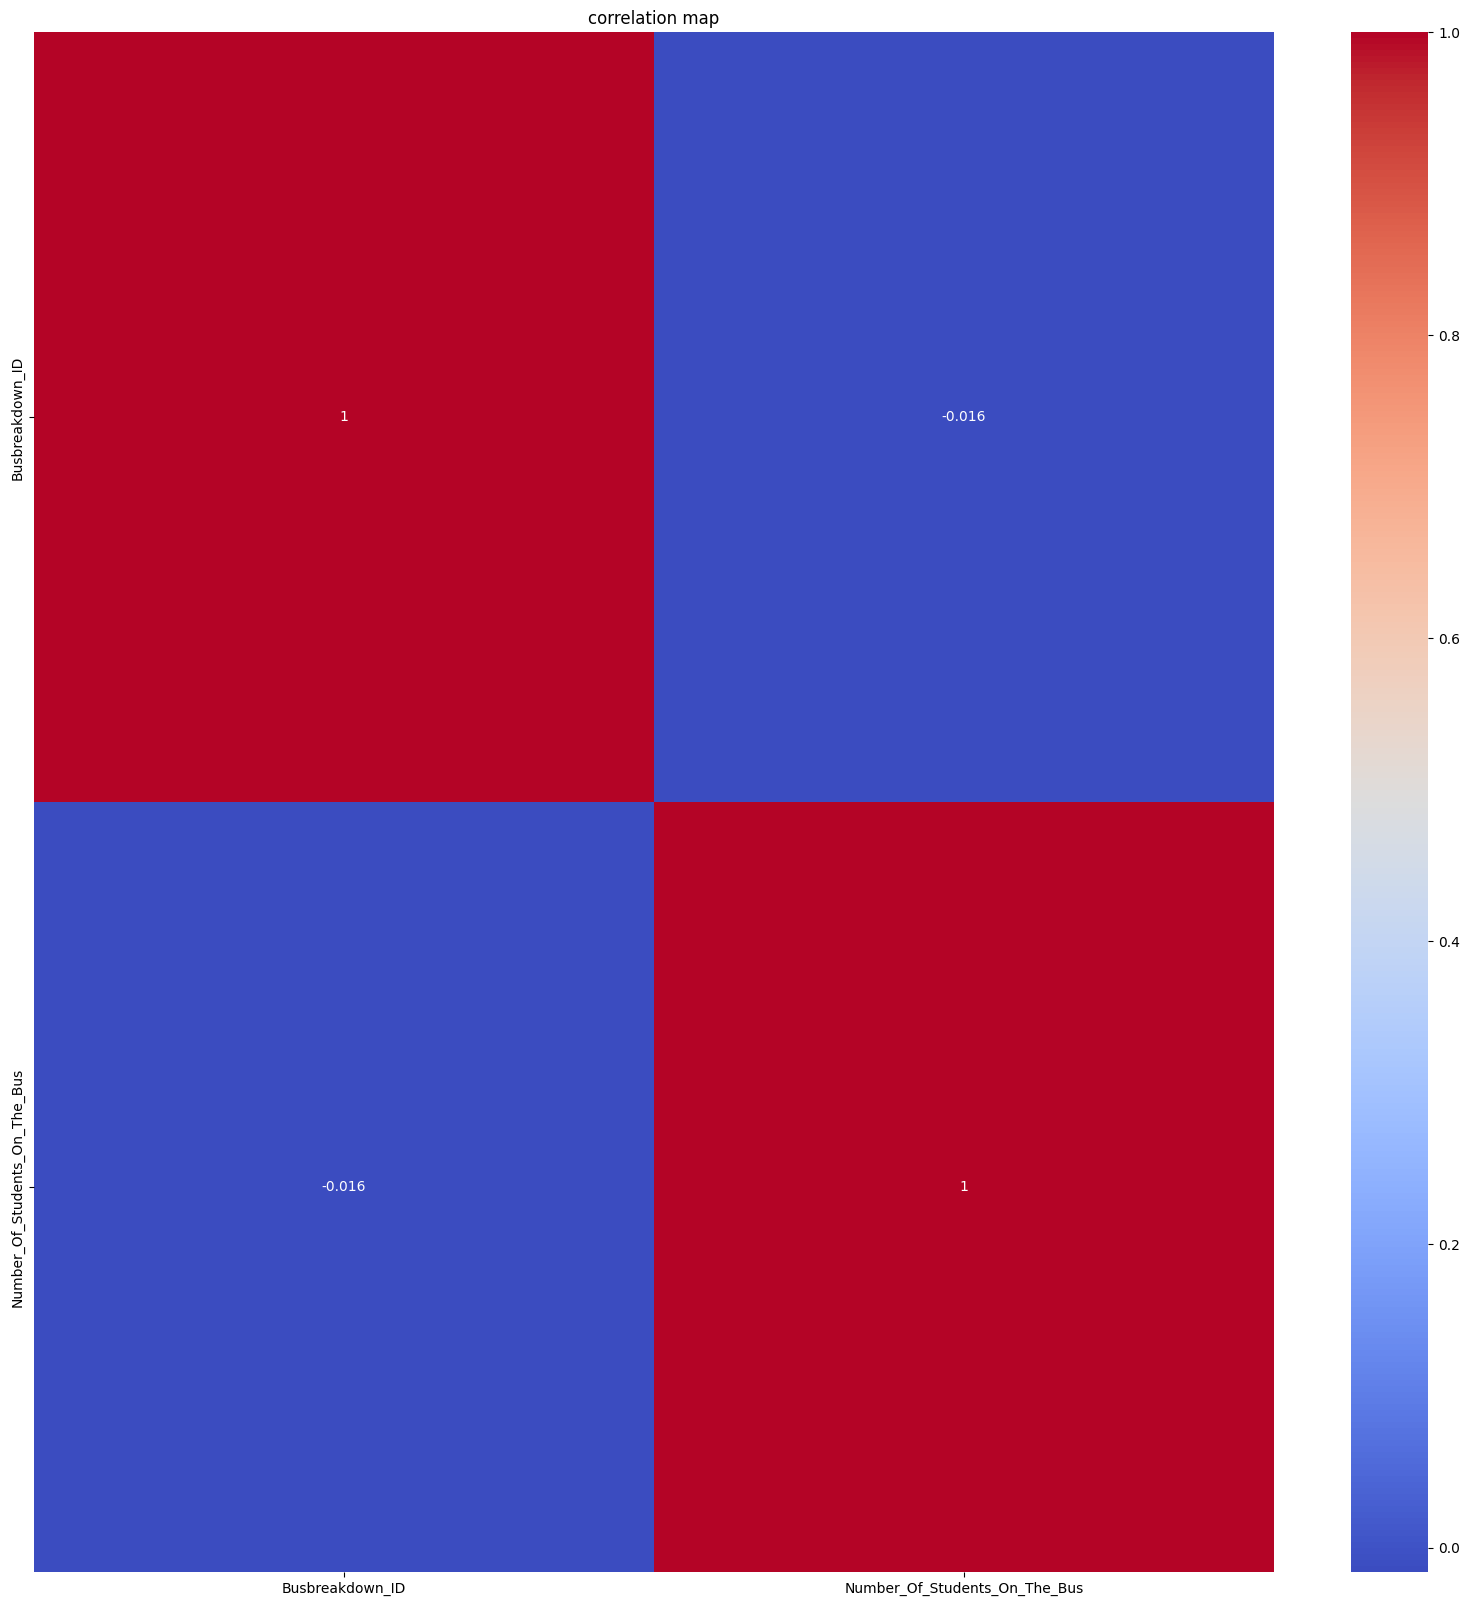

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(numerical_features.corr(),annot=True ,cmap="coolwarm")
plt.title("correlation map")
plt.show()

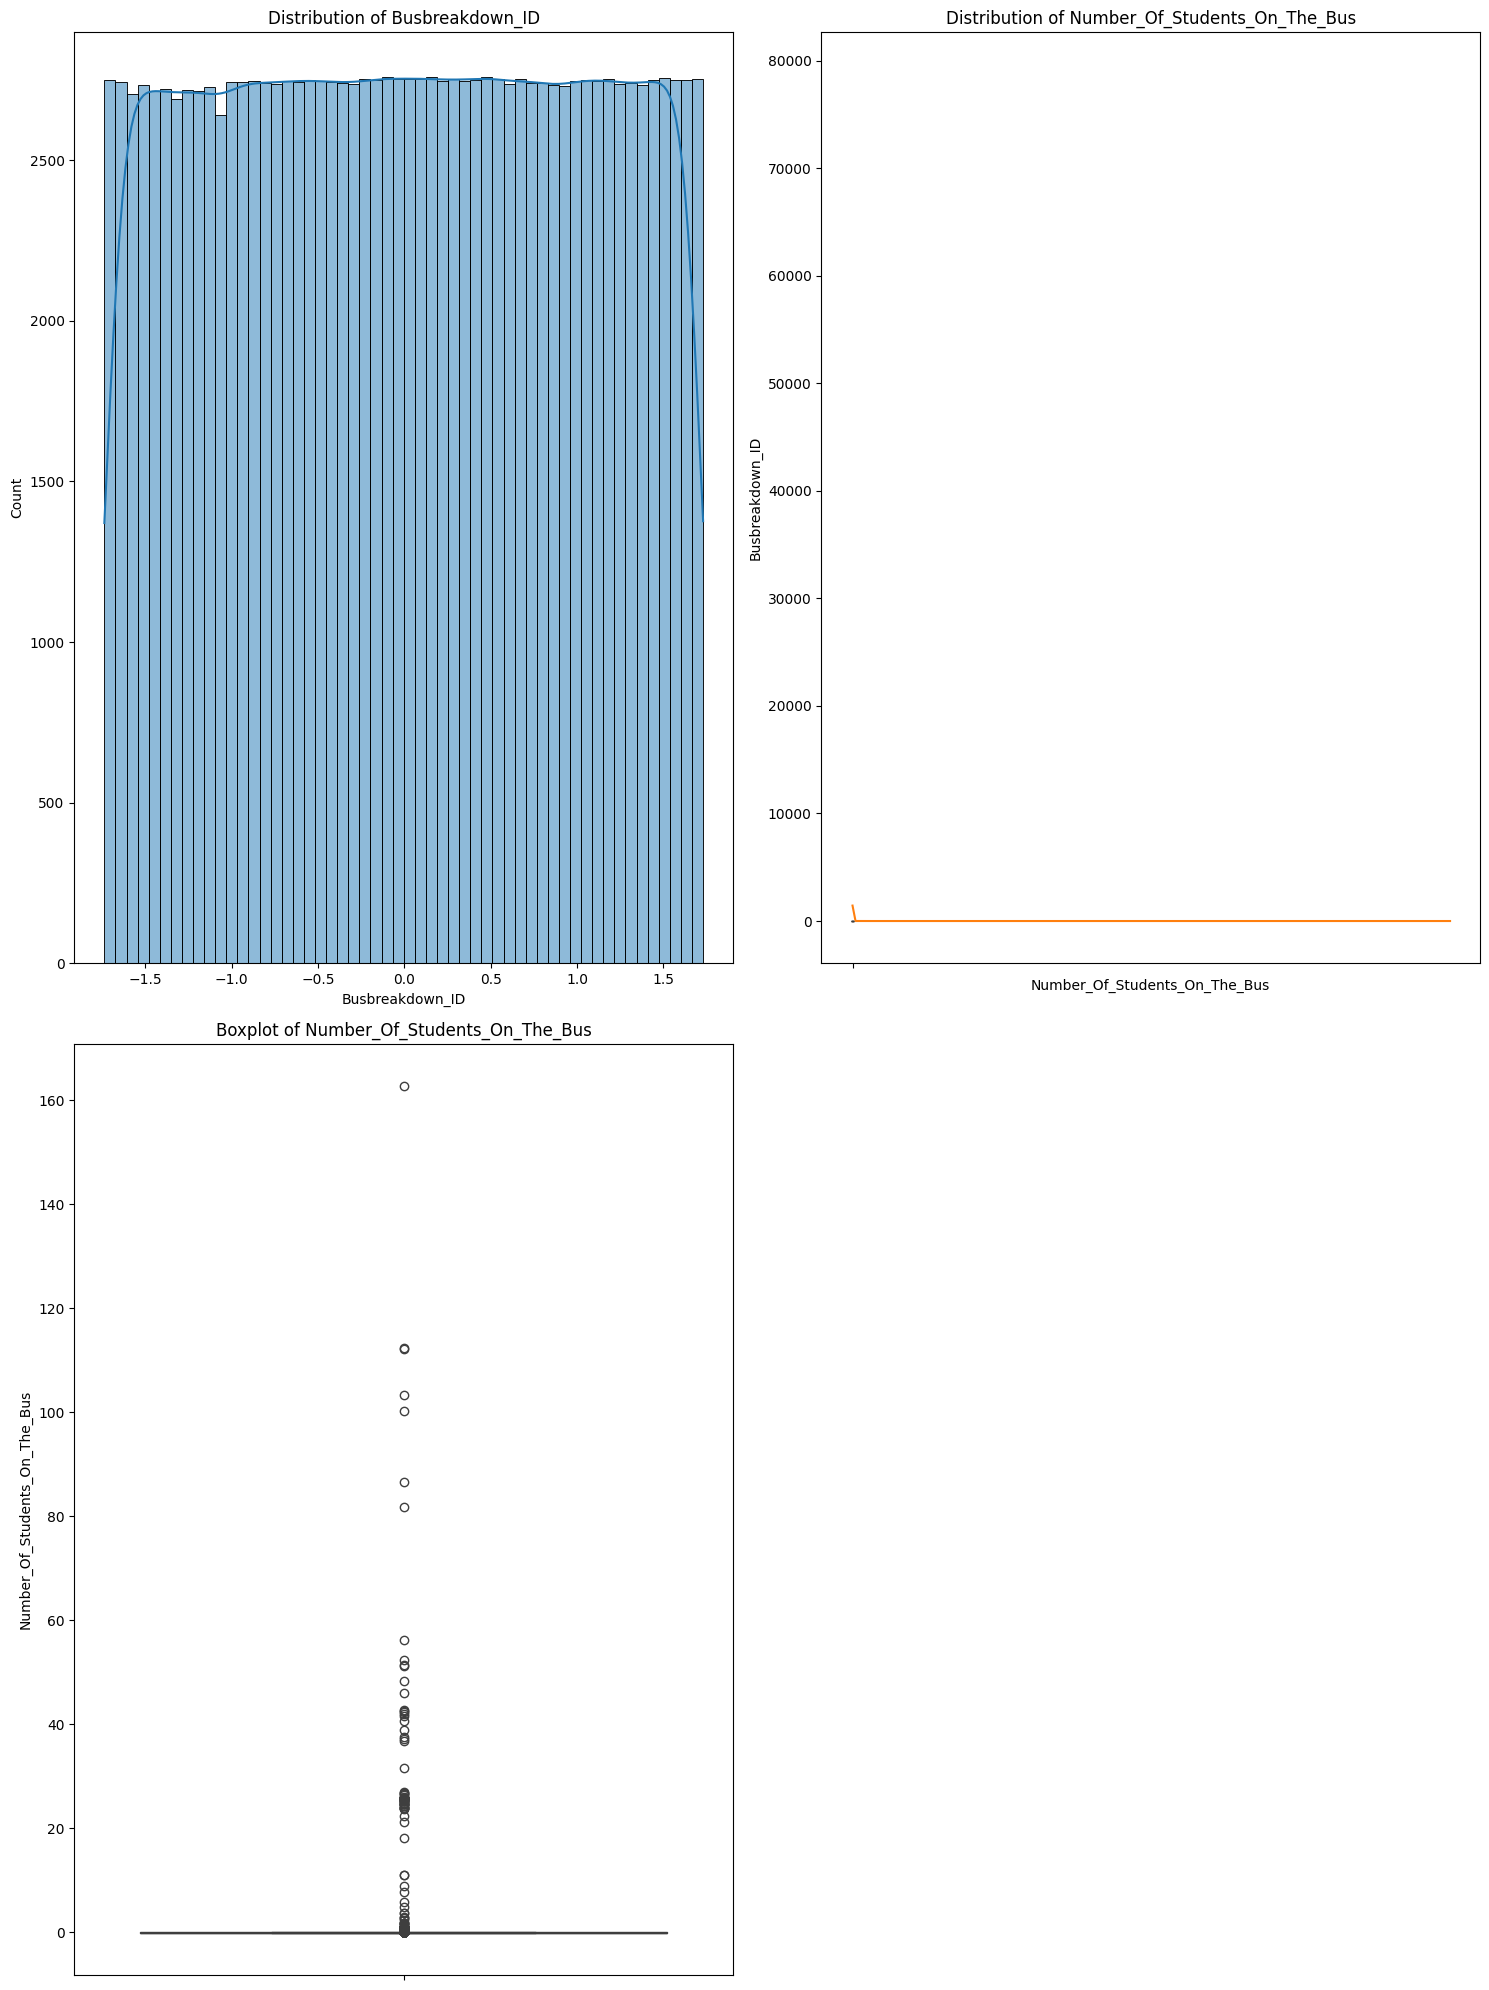

In [39]:

numerical_features = df.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(15, 20))


for i, feature in enumerate(numerical_features.columns):
    plt.subplot(len(numerical_features.columns), 2, i + 1)


    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')


    plt.subplot(len(numerical_features.columns), 2, i + 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()

plt.show()

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [14]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu'))#, input_shape=(X_train.shape[1],)))
model.add(Dense(92, activation='relu'))
model.add(Dense(92, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [22]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

## Training the Model
Train the ANN model using the training data.

In [26]:
X_cat_enc

array([[3.00000e+00, 7.48100e+03, 7.70000e+01, ..., 1.16763e+05,
        1.00000e+00, 0.00000e+00],
       [3.00000e+00, 8.11400e+03, 7.70000e+01, ..., 1.17361e+05,
        1.00000e+00, 0.00000e+00],
       [3.00000e+00, 4.66200e+03, 2.09000e+02, ..., 9.84860e+04,
        1.00000e+00, 0.00000e+00],
       ...,
       [9.00000e+00, 8.64200e+03, 1.08800e+04, ..., 7.19790e+04,
        1.00000e+00, 1.00000e+00],
       [9.00000e+00, 6.14500e+03, 7.66300e+03, ..., 7.19780e+04,
        0.00000e+00, 1.00000e+00],
       [6.00000e+00, 3.50200e+03, 2.28800e+03, ..., 7.19800e+04,
        1.00000e+00, 1.00000e+00]])

In [29]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

label_encoder = OrdinalEncoder()

# Assuming 'Reason' is the column name containing the labels
X_cat_enc = label_encoder.fit_transform(df[['Reason']])

In [34]:
history = model.fit(X_cat_enc, y_train,batch_size=512, epochs=10, validation_split=0.2,callbacks=early_stopping)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-31-4c269fd4789f>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 357, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 325, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 609, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 645, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 39, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/optree/ops.py", line 747, in tree_map

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 40, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 743, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_3503]

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test, y_test)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
history.history.keys()

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 1])
plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save("mdael_h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

First, I checked the CSV file as a first look at the file

2- I made sure that there were no missing data, but there was missing data.

 3- I developed a strategy to solve the problem of missing data and then filled it with average values.
  
  4- I plotted the missing values ​​as a graph to make it easier for those concerned to see, update or communicate the information.
  
   5- I represented the text columns and Digitally, then I drew a scatterplot graph to detect outliers


   All columns were converted to digital through encryption (). After that, the values ​​were placed in a range to facilitate processing and to reduce and solve the problem of outliers.

# New SectionIf I had more time I would do these things
# 1- Clean data more thoroughly
# 2- Indirectly discovering any significance of missing data
# 3- Increasing the complexity of the data by adding a screenshot to the images, enlarging the images, rotating the images, and all available methods to complicate the data.
# 4- The complexity of the data aims to increase the quality of the model and make it work in the most difficult circumstances